In [1]:
import numpy as np

from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
def to_hit(mod, ac):
   return min(1, max(0, 1 - (ac - mod - 1) / 20))


def to_save(dc, save_mod):
   return to_hit(save_mod, dc)


def factor_ac(bonus, target_ac, damage, adv=0):
   if adv == 0:
      hit_chance = to_hit(bonus, target_ac)
   elif adv < 0:
      hit_chance = (to_hit(bonus, target_ac)) ** (-1 + -adv)
   else:
      hit_chance = 1 - ((1 - (to_hit(bonus, target_ac))) ** (1 + adv))
   return hit_chance * damage

d_sw = 8.5+13*0.05
d_tk = 13.5


AC = np.arange(0, 25, 1)
STR_SAVE = np.arange(0,25,1)
WIS_SAVE = np.arange(0,25,1)

In [14]:
def t(x,y,z):
    return x + y < z

xl = np.linspace(0, 10, 50)
X, Y, Z = np.meshgrid(xl, xl, xl)
F = t(X, Y, Z)
print(F)

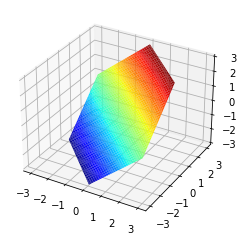

In [15]:
plt.clf()
plt.cla()
plt.close()

verts, faces, normals, values = measure.marching_cubes(F, 0, spacing=[np.diff(xl)[0]]*3)
verts -= 3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='jet', lw=0)